In [12]:
# Import our libraries 
import matplotlib.pyplot as plt
# Pandas and numpy for data wrangling
import pandas as pd
# Seaborn / matplotlib for visualization 
import seaborn as sns
import matplotlib
# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, r2_score, f1_score, precision_score

# Helper function for hyper-parameter turning.


# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Use inline so our visualizations display in notebook
%matplotlib inline

## Main Steps when building a Machine Learning Model. 
1. Inspect and explore data.
2. Select and engineer features.
3. Build and train model.
4. Evaluate model.

# #1 Inspect and explore data.
* Load titanic data
* Visualize all the data using sns.pairplot
* Check for null values

In [13]:
# Load in the titanic data set.
df = pd.read_csv('data/titanic.csv')

In [14]:
# Visualize all the data using sns.pairplot
sns.pairplot(df)

In [15]:
# Check for null values
print(df.isnull().sum())


passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64


# #2 Select and engineer features.
1. Fill age null values with -999
1. Convert to numerical values if need be by using `pd.get_dummies()`
1. Create a list of the features you are going to use.  In this case use as many or as little as you would like.
1. Define our `X` and `y`
1. Split our data into trainig and testing sets.

In [16]:
# Fill age null values with -999
df["age"].fillna(-999)

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
       ...  
886     27.0
887     19.0
888   -999.0
889     26.0
890     32.0
Name: age, Length: 891, dtype: float64

In [17]:
# 1. Convert to numerical values if need be by using `pd.get_dummies()`
#dummies = df

In [18]:
# 2. Create a list of the features we are going to use.
df.head()
selected_features = ["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]
#fare and embarked will be experimental features - correlation is to be tested


In [19]:
# Define our `X` and `y`
df_encoded = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)
print(df_encoded)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Apply label encoding to 'sex' and 'embarked' columns
df['sex'] = label_encoder.fit_transform(df['sex'])
df['embarked'] = label_encoder.fit_transform(df['embarked'])

print(df.head())

X = df[selected_features]

y = df["survived"]


     passengerid  survived  pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  name   age  sibsp  parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                                 ...   ...    ...    ... 

In [20]:
# Split our data into trainig and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_test)
print('Lenght of our Training data:', len(X_test), '\nLength of our Testing data:', len(y_test))

Lenght of our Training data: 179 
Length of our Testing data: 179


# #3 Build and train model.
1. For our first pass, initialize our model with `max_depth=2`.
2. Fit our model with our training data. 
3. Make predictions of our testing data. 
4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
    * To calculate auc score you have to get the predicted probabilites for the Survived class using `model.predict_proba(X_test)[:,1]`
5. Visualize our Decision Tree using provided code. 


In [21]:
# For our first pass, initialize our model with `max_depth=2`.
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)
print(X_train.dtypes)

pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object


In [22]:
# Fit our model with our training data. 
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [23]:
# Make predictions of our testing data. 
pred = model.predict(X_test)



In [24]:
# 4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
from sklearn.metrics import recall_score, roc_auc_score, matthews_corrcoef
def metrics(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    print("Accuracy Score: %f" % accuracy)

    precision = precision_score(y_test, pred)
    print("Precision Score: %f" % precision)

    recall = recall_score(y_test, pred)
    print("Recall Score: %f" % recall)

    f1 = f1_score(y_test, pred)
    print('F1 Score: %f' % f1)

    mcc = matthews_corrcoef(y_test, pred)
    print('MCC Score: %f' % f1)
    print("Where 1 is for Perfect Prediction, 0 for Random Prediction, -1 for total disagreement")

# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# Compute auc score
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC Score: %f' % auc)

metrics(y_test, pred)

AUC Score: 0.800257
Accuracy Score: 0.765363
Precision Score: 0.880952
Recall Score: 0.500000
F1 Score: 0.637931
MCC Score: 0.637931
Where 1 is for Perfect Prediction, 0 for Random Prediction, -1 for total disagreement


# Visualize your tree

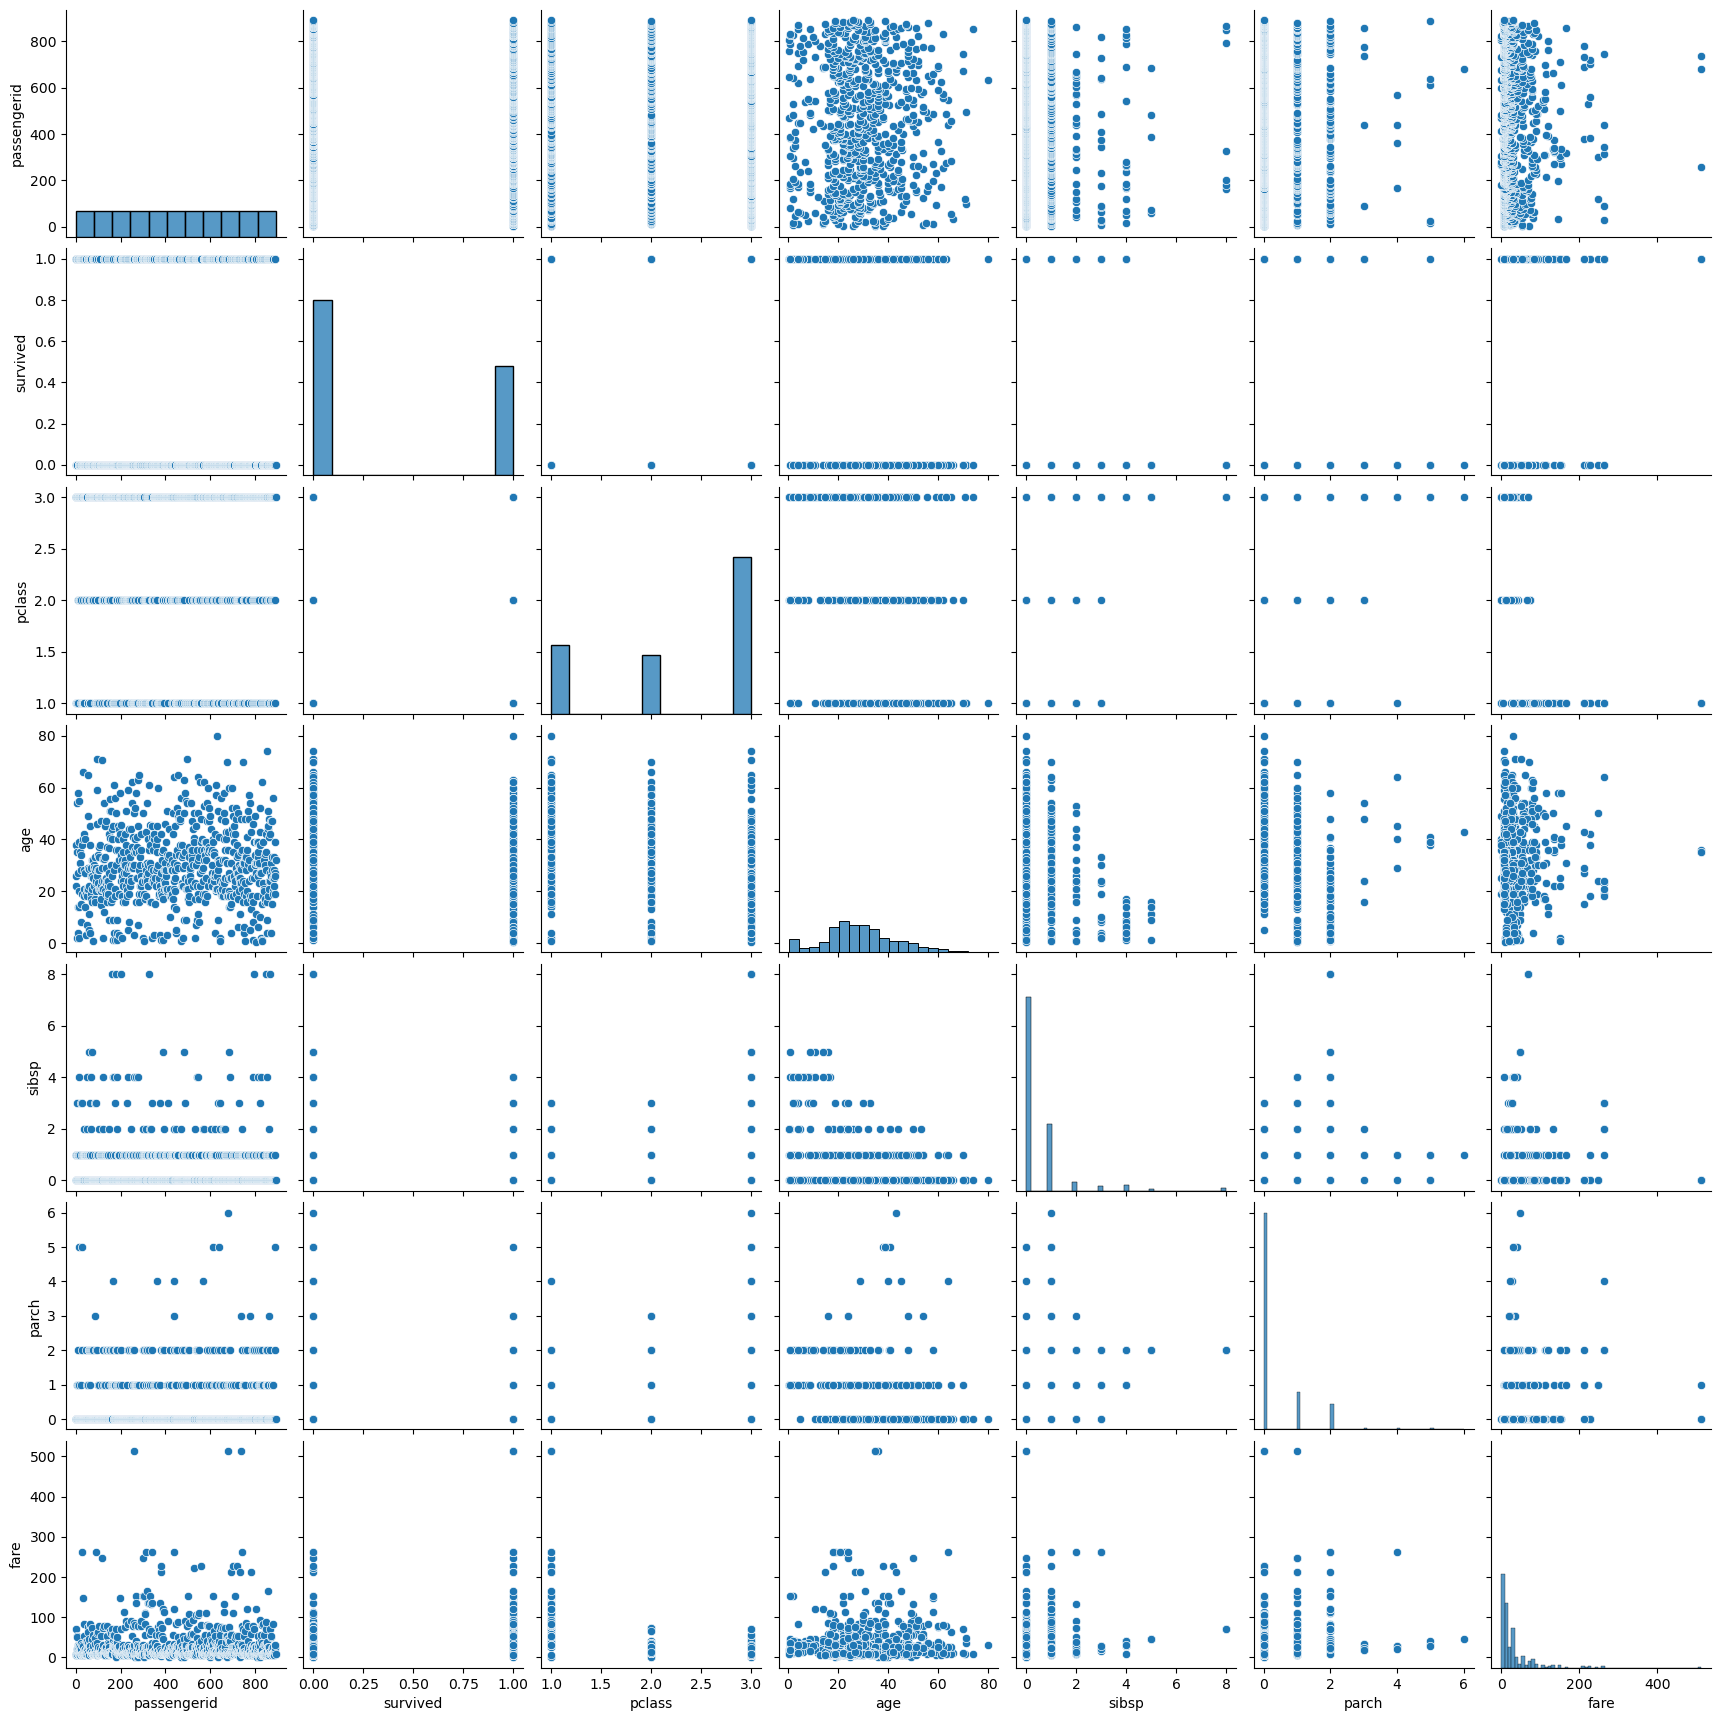

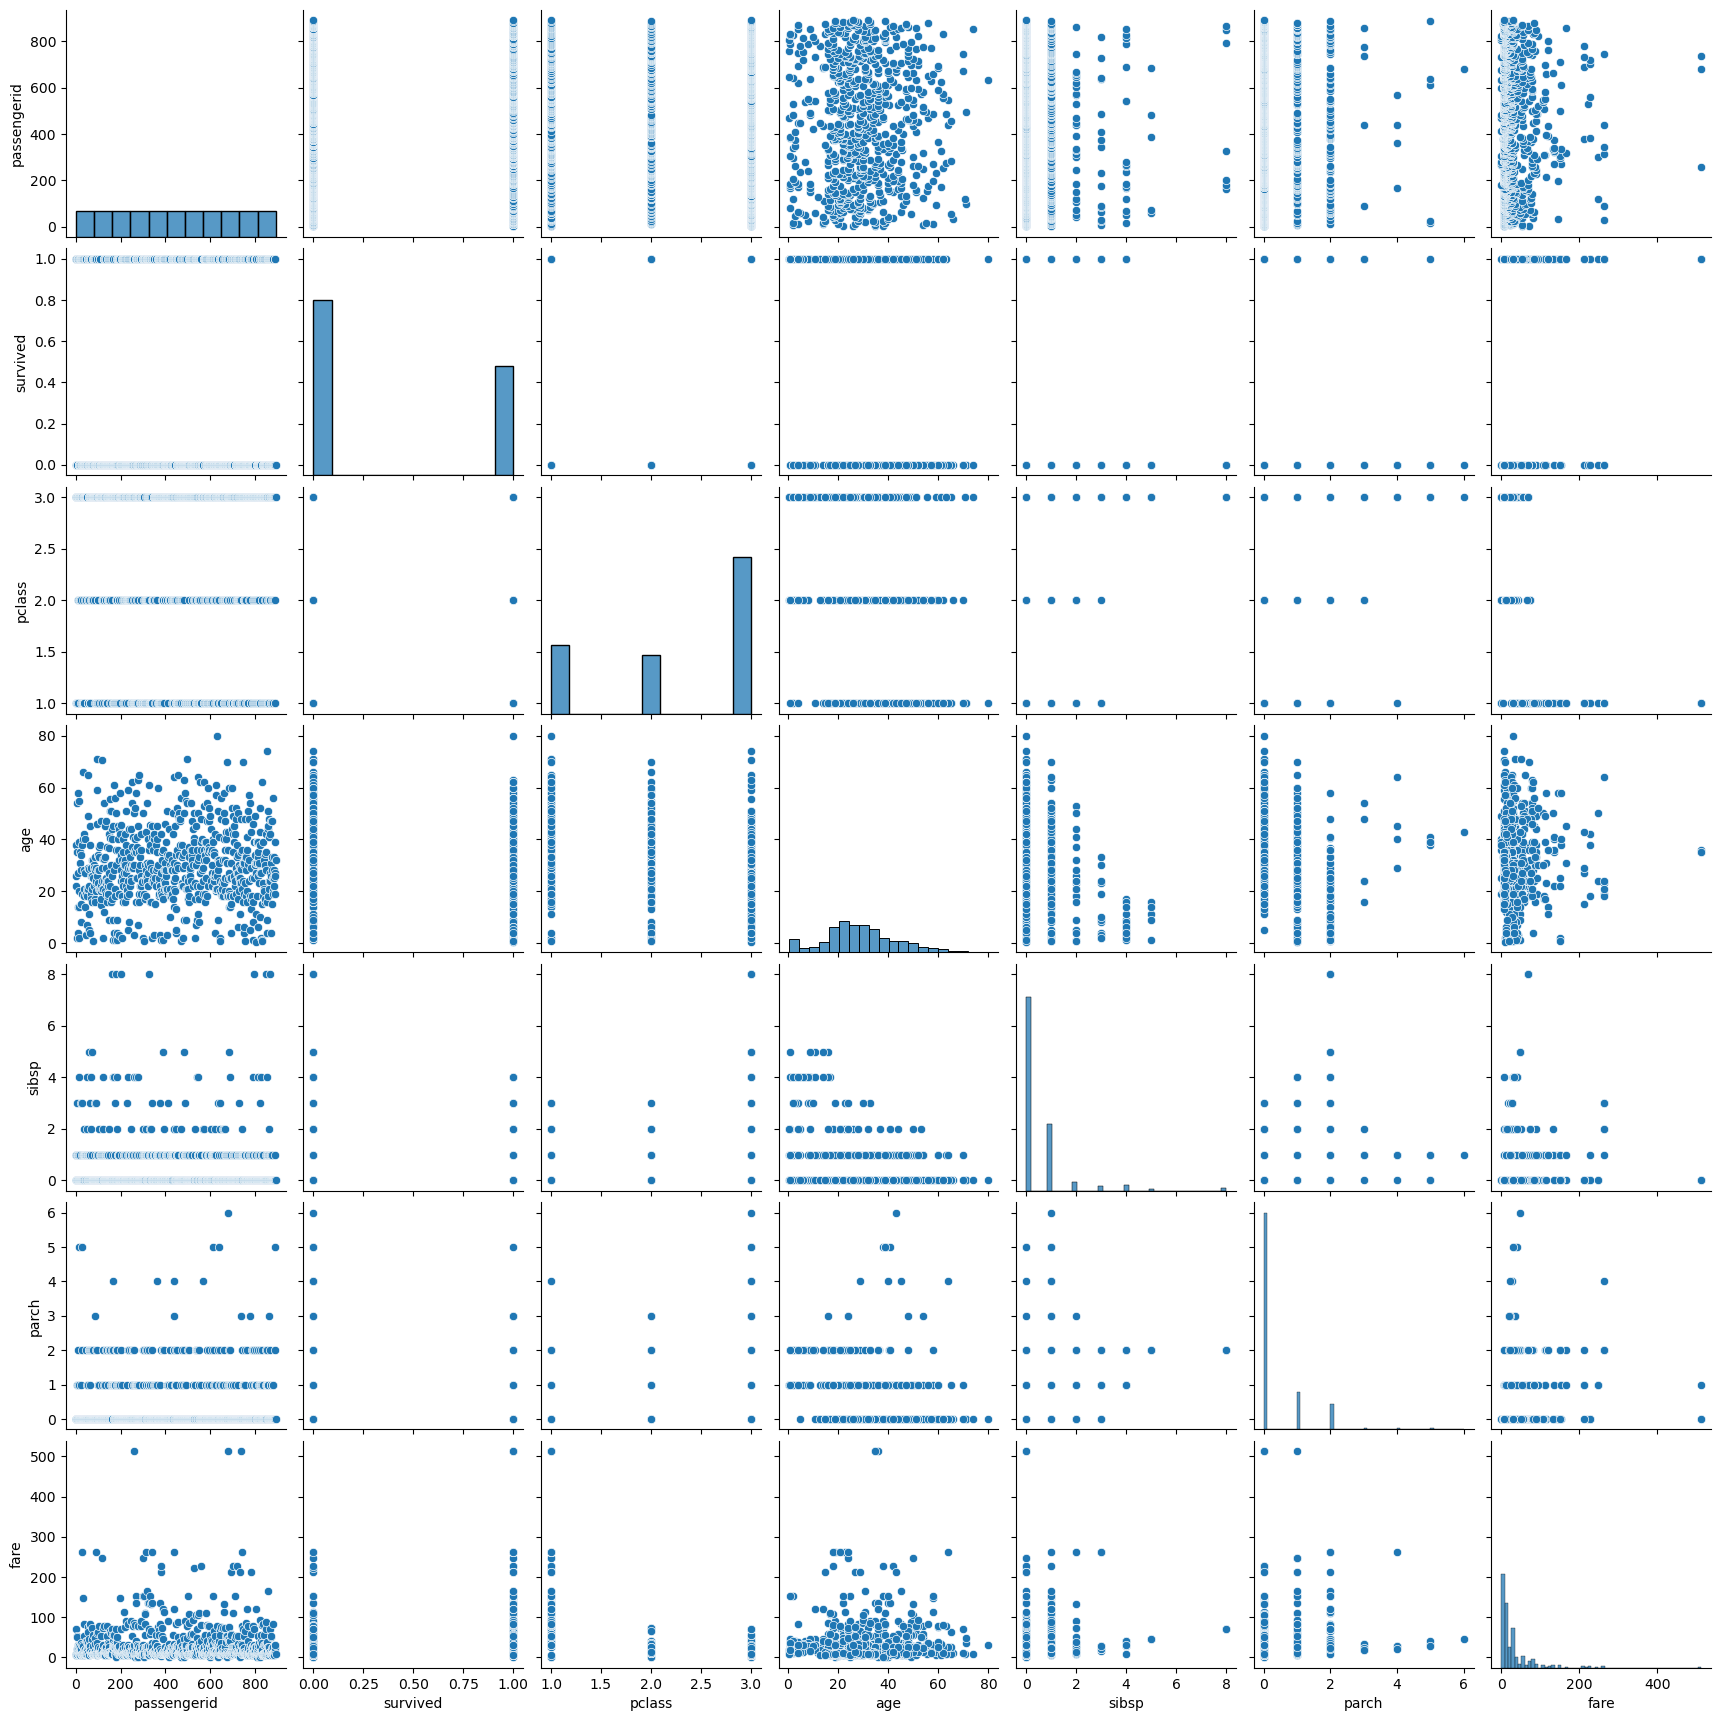

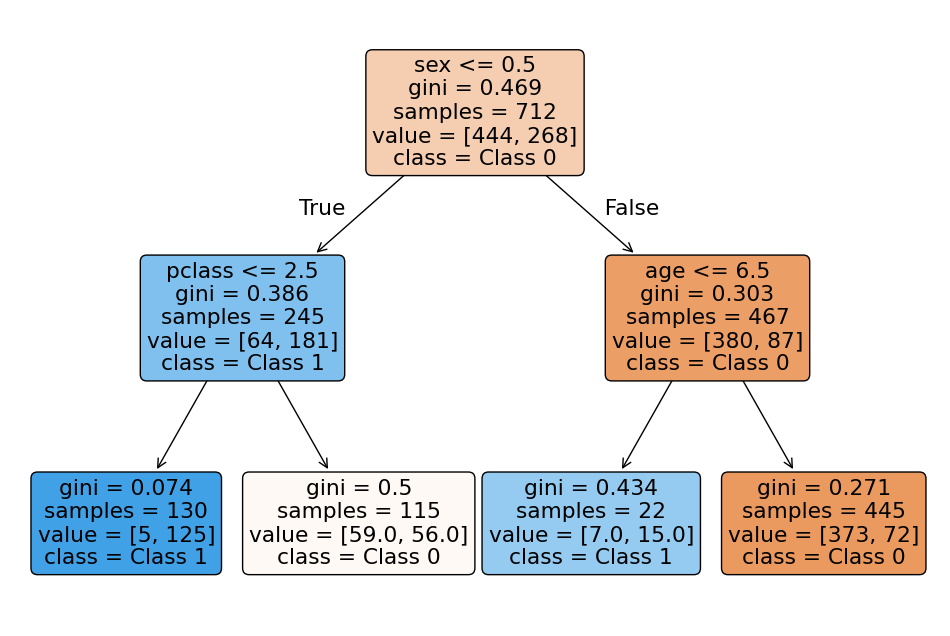

In [25]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=["Class 0", "Class 1"], rounded=True)
plt.show()

# Picking the right parameters...

In [26]:
#metrics(y_test, pred)

model = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)

selected_features = ["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]
#fare and embarked will be experimental features - correlation is to be tested

param_grid = {  
    'criterion' : ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [5, 10], 
    'max_leaf_nodes': [5, 10],
} 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

#model = RandomForestClassifier(n_estimators = 2) 
#model.fit(X_train, y_train) wrong order

grid_search = GridSearchCV(model, param_grid=param_grid) #needs the unfitted model
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 


model_grid = grid_search.best_estimator_
y_pred_grid = grid_search.predict(X_test) 
print(classification_report(y_pred_grid, y_test)) 


random_search = RandomizedSearchCV(model,param_grid) 
random_search.fit(X_train, y_train) 
print(random_search.best_estimator_) 

model_random = random_search.best_estimator_
y_pred_rand = random_search.predict(X_test) 
print(classification_report(y_pred_rand, y_test)) 

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=10,
                       random_state=42)
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       115
           1       0.69      0.80      0.74        64

    accuracy                           0.80       179
   macro avg       0.78      0.80      0.79       179
weighted avg       0.81      0.80      0.80       179

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10, random_state=42)
              precision    recall  f1-score   support

           0       0.89      0.79      0.83       118
           1       0.66      0.80      0.73        61

    accuracy                           0.79       179
   macro avg       0.77      0.80      0.78       179
weighted avg       0.81      0.79      0.80       179



# Parameter tuning of your Decision Tree using GridSearch or RandomizedSearch

### For assistance on this, look at Steves TA Tips code in `TA-Tips/random_forest_tuning.ipynb`


1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Visualize your best tree.
1. Which feature was your most important feature?

```python
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
```


[Tips on how to customize / set the paramters in the decision tree.](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use)

In [27]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search.from sklearn.model_selection import GridSearchCV
# params = { 
#     'PARAMETER_NAME': ['LIST', 'OF', 'VALUES'], ??? }
selected_features = ["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]
#fare and embarked will be experimental features - correlation is to be tested

param_grid = {  
    'criterion' : ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [5, 10], 
    'max_leaf_nodes': [5, 10],
} 

In [28]:
# 1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
#grid_search_cv =  GridSearchCV(model, param_grid=param_grid)
grid_search = GridSearchCV(model, param_grid=param_grid) 


In [29]:
# 1. Fit your GridSearchCV with your training data. 
grid_search.fit(X_train, y_train) 


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [5, 10], 'max_features': ['sqrt', 'log2', ...], 'max_leaf_nodes': [5, 10]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [30]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found
print(grid_search.best_estimator_) 

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=10,
                       random_state=42)


In [31]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you the best tree
model = grid_search.best_estimator_

# Now lets evaluate our model
y_pred = model.predict(X_test)

metrics(y_pred, y_test)

# accuracy = ???
# print("Accuracy Score: %f" % accuracy)

# precision = ???
# print("Precision Score: %f" % precision)

# recall = ???
# print("Recall Score: %f" % recall)

# f1 = ???
# print('F1 Score: %f' % f1)

# # Calculate predicted probabilities, keep only probability for when class = 1
# y_pred_proba = model.predict_proba(???)[:,1]
# auc = ???
# print('AUC Score: %f' % auc)

Accuracy Score: 0.798883
Precision Score: 0.689189
Recall Score: 0.796875
F1 Score: 0.739130
MCC Score: 0.739130
Where 1 is for Perfect Prediction, 0 for Random Prediction, -1 for total disagreement


In [32]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances


# Now onto Random Forests...
Were going to do the same with, but this time with a random forest. Remeber... Repetition is the father of learning.

1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Which feature was your most important feature?


# Parameters of the Random Forest Classifier

```python
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
```

In [33]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
params = {
    'PARAMETER_1_NAME': ['LIST', 'OF', 'VALUES'], 
    'PARAMETER_2_NAME': ['LIST', 'OF', 'VALUES'],
    'PARAMETER_3_NAME': ['LIST', 'OF', 'VALUES'],
}
param_grid = {  
    'criterion' : ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [5, 10], 
    'max_leaf_nodes': [5, 10],
}

model = RandomForestClassifier()



In [34]:
# 1. Initalize your GridSearchCV or RandomizedSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.

random_search = RandomizedSearchCV(model, param_grid)


In [35]:
# 1. Fit your RandomizedSearchCV with your training data. 
random_search.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_distributions,"{'criterion': ['gini', 'entropy'], 'max_depth': [5, 10], 'max_features': ['sqrt', 'log2', ...], 'max_leaf_nodes': [5, 10]}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [36]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found
print(random_search.best_params_)

print(random_search.best_estimator_)

print(random_search.best_score_)




{'max_leaf_nodes': 10, 'max_features': None, 'max_depth': 5, 'criterion': 'entropy'}
RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None,
                       max_leaf_nodes=10)
0.8244164286417808


In [37]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you tree that has the highest f1-score. 
model = random_search.best_estimator_

y_pred = model.predict(X_test)

metrics(y_test, y_pred)

# Now lets evaluate our model
# y_pred = ???

# accuracy = ???
# print("Accuracy Score: %f" % accuracy)

# precision = ???
# print("Precision Score: %f" % precision)

# recall = ???
# print("Recall Score: %f" % recall)

# f1 = ???
# print('F1 Score: %f' % f1)

# # Calculate predicted probabilities, keep only probability for when class = 1
# y_pred_proba = model.predict_proba(X_test)[:,1]

# auc = ???
# print('AUC Score: %f' % auc)

Accuracy Score: 0.804469
Precision Score: 0.809524
Recall Score: 0.689189
F1 Score: 0.744526
MCC Score: 0.744526
Where 1 is for Perfect Prediction, 0 for Random Prediction, -1 for total disagreement


In [38]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances
feature_imp = pd.Series(model.feature_importances_,index=selected_features).sort_values(ascending=False)
feature_imp

sex         0.487761
pclass      0.209002
fare        0.124597
age         0.112649
sibsp       0.050887
embarked    0.011172
parch       0.003933
dtype: float64

# Build a random forest using the ny-vs-sf-housing.csv data. 
* Your target variable, aka the column you are trying to predict, aka your `y` variable is `in_sf`. 
* Can you get an accuracy above %88.8889?
* What was your most important feature?


In [39]:
df = pd.read_csv('data/ny-vs-sf-houses.csv')
df.head()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


In [40]:
# BUILD, TRAIN, AND EVAULATE A RANDOM FOREST MODEL BELOW. 
model = RandomForestClassifier()

#Wrong use of RandomForest - 
# should be to clasify whether the apartment is in nyc or sf

# X = df["elevation", "in_sf", "beds", "bath"]
# X_next = df["elevation", "in_sf", "beds", "bath", "sqft"]
# X_with_hidden_answer = df["elevation", "in_sf", "beds", "bath", "sqft", "price_per_sqft"]

# y = df["price"]
selected_features = ["elevation", "beds", "bath", "sqft", "price_per_sqft", "price", "year_built"]

X = df[selected_features]
y = df[["in_sf"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
model.fit(X_train, y_train)

pred = model.predict(X_test)

metrics(y_test, pred)

feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp




c:\Users\delom\miniconda3\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy Score: 0.909091
Precision Score: 0.898305
Recall Score: 0.946429
F1 Score: 0.921739
MCC Score: 0.921739
Where 1 is for Perfect Prediction, 0 for Random Prediction, -1 for total disagreement


,feature_importance,feature
0,0.323855,elevation
4,0.254693,price_per_sqft
5,0.115577,price
3,0.113771,sqft
6,0.107318,year_built
1,0.055463,beds
2,0.029322,bath


In [41]:
import warnings
warnings.filterwarnings("ignore")


model = RandomForestClassifier()

grid_search = GridSearchCV(model, param_grid=param_grid, verbose=False) #needs the unfitted model
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 


model_grid = grid_search.best_estimator_
y_pred_grid = grid_search.predict(X_test) 
print(classification_report(y_pred_grid, y_test)) 

feature_imp = pd.DataFrame.from_dict( {'feature_importance': model_grid.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp



RandomForestClassifier(criterion='entropy', max_depth=10, max_features=None,
                       max_leaf_nodes=10)
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.93      0.93      0.93        56

    accuracy                           0.92        99
   macro avg       0.92      0.92      0.92        99
weighted avg       0.92      0.92      0.92        99



,feature_importance,feature
0,0.557839,elevation
4,0.187622,price_per_sqft
6,0.140733,year_built
3,0.052120,sqft
5,0.044882,price
1,0.011133,beds
2,0.005672,bath


# Awesome difficult extra credit below:
Build a classifier using the adult_income.csv data.  
* The target variable is 'class'
* Start with just using these features `selected_features = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']`
* You have to include the pos_label in your precision, recall, and f1 scores. It just tells the classifier which one is the positive label.  I provided the proper way below.

* See if you can get above 50% f1 score.  
* See some [super tricks and tips here](https://www.kaggle.com/code/jieyima/income-classification-model)

In [42]:
df = pd.read_csv('data/adult_income.csv')
print(df.head())


print(df.isnull().sum())


df = df.dropna()

#We want to predict if the income is <50k or >50k






   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country   class  
0          2174             0              40   United-States   <=50

In [43]:
#simplifying data to simplify model
my_df = df

my_df['education'].replace('Preschool', 'dropout',inplace=True)
my_df['education'].replace('10th', 'dropout',inplace=True)
my_df['education'].replace('11th', 'dropout',inplace=True)
my_df['education'].replace('12th', 'dropout',inplace=True)
my_df['education'].replace('1st-4th', 'dropout',inplace=True)
my_df['education'].replace('5th-6th', 'dropout',inplace=True)
my_df['education'].replace('7th-8th', 'dropout',inplace=True)
my_df['education'].replace('9th', 'dropout',inplace=True)
my_df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
my_df['education'].replace('HS-grad', 'HighGrad',inplace=True)
my_df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
my_df['education'].replace('Bachelors', 'Bachelors',inplace=True)
my_df['education'].replace('Masters', 'Masters',inplace=True)
my_df['education'].replace('Prof-school', 'Masters',inplace=True)
my_df['education'].replace('Doctorate', 'Doctorate',inplace=True)


my_df['marital_status'].replace('Never-married', 'NotMarried',inplace=True)
my_df['marital_status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
my_df['marital_status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
my_df['marital_status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
my_df['marital_status'].replace(['Separated'], 'Separated',inplace=True)
my_df['marital_status'].replace(['Divorced'], 'Separated',inplace=True)
my_df['marital_status'].replace(['Widowed'], 'Widowed',inplace=True)


print(my_df.head())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country   class  
0          2174             0              40   United-States   <=50

In [44]:
#crossing figures to reduce complexity
my_df['age-hours'] = my_df['age']*my_df['hours_per_week']
#split into 10 numeric bins to reduce noise impact on complexity
my_df['age-hours_bin'] = pd.cut(my_df['age-hours'], 10)




# selected_features = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']
# X = df[selected_features]
# y = df[['class']]

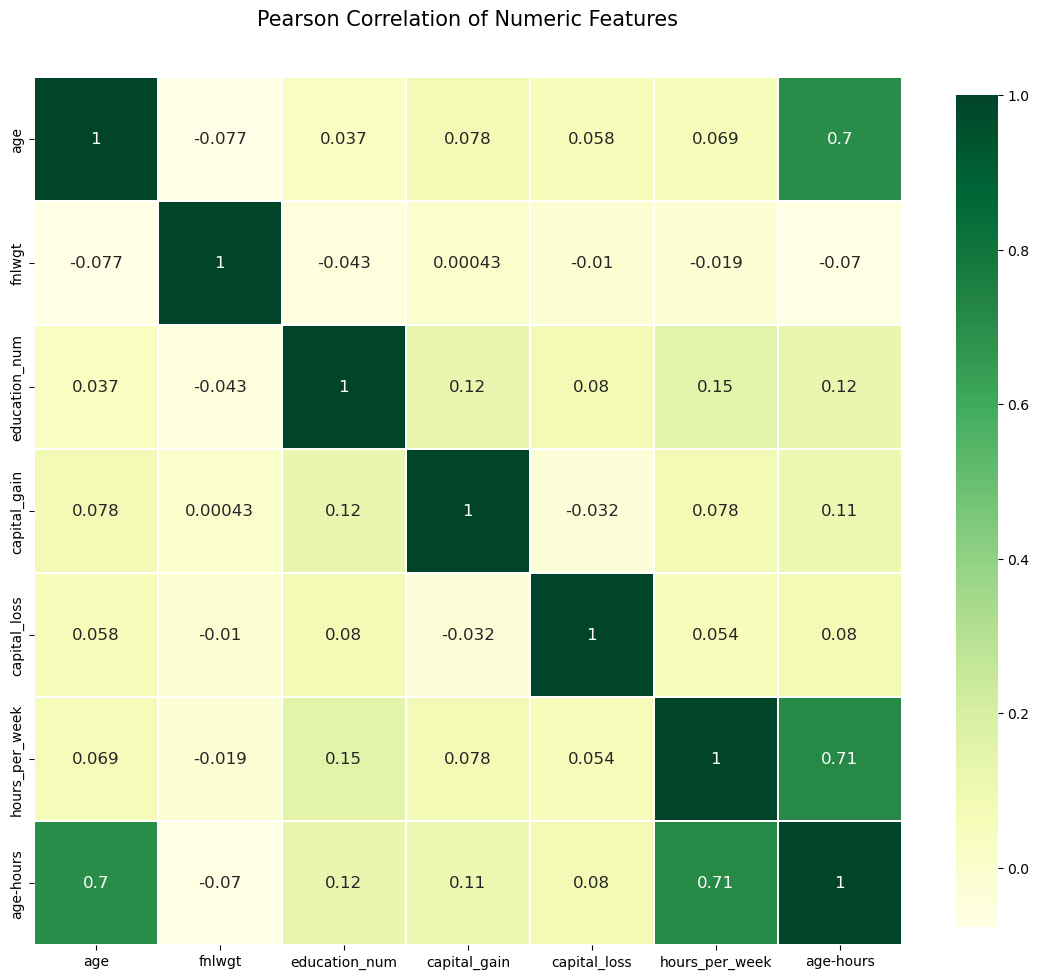

In [45]:
def correlation_heatmap(df):
    df_num = df.select_dtypes(include=['number'])
    _ , ax = plt.subplots(figsize =(14, 12))
    
    sns.heatmap(
        df_num.corr(),
        cmap = "YlGn",
        square=True,
        cbar_kws={'shrink':.9},
        ax=ax,
        annot=True,
        linewidths=0.1,
        vmax=1.0,
        linecolor='white',
        annot_kws={'fontsize':12}
    )
    
    plt.title('Pearson Correlation of Numeric Features', y=1.05, size=15)
    plt.show()

correlation_heatmap(my_df)

In [46]:
my_df = my_df.apply(LabelEncoder().fit_transform)
my_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,age-hours,age-hours_bin
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0,631,1
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0,290,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0,620,1
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0,810,2
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0,477,1


In [47]:
drop_elements = ['education', 'native_country', 'class', 'age-hours_bin']
y = my_df["class"]
X = my_df.drop(drop_elements, axis=1)
X.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,age-hours
0,22,7,2671,12,4,1,1,4,1,25,0,39,631
1,33,6,2926,12,2,4,0,4,1,0,0,12,290
2,21,4,14086,8,0,6,1,4,1,0,0,39,620
3,36,4,15336,6,2,6,0,2,1,0,0,39,810
4,11,4,19355,12,2,10,5,2,0,0,0,39,477


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


std_scale = preprocessing.StandardScaler().fit(my_df.drop('class', axis=1))

X = std_scale.transform(my_df.drop('class', axis=1))
y = my_df['class']

# Formatting
target_names = [0,1]
colors = ['blue','yellow','pink']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)